In [1]:
import time
start_time=time.time()

In [2]:
import sys
import json
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
import seaborn as sns
import lmfit


604

In [3]:
def bfunc(r, r0, sig2, m, s0):
    "Theoretical structure function"
    C = 1.0 / (1.0 + (r/r0)**m)
    a = (np.tanh((r/s0)**2))**2
    return 2.0*a*sig2*(1 - C)

data = json.load(open("SFdata//604.json"))

sns.set_color_codes()


pixscale = 0.26 # arcsec
pixscale *= 4.09              # parsec
r = pixscale * 10**np.array(data["log10 r"])
B = np.array(data["Unweighted B(r)"])
sig2 = data["Unweighted sigma^2"]
B_w = np.array(data["Weighted B(r)"])
sig2_w = data["Weighted sigma^2"]
s0 = 4.09/2.355                    # parsec




In [4]:
r

array([  1.0634    ,   1.50209242,   2.12176195,   2.99706841,
         4.23347165,   5.97993765,   8.44688645,  11.93154424,
        16.85375421,  23.80656059,  33.62766064,  47.50033319,
        67.09600401,  94.77562476, 133.87412829])

In [5]:
B

array([  1.9057852 ,   3.90697386,   7.22286646,  13.48128552,
        23.47866655,  36.72422086,  52.04679308,  65.95774045,
        75.41742209,  93.83361035, 123.03824318, 140.89454558,
       120.49165553,  87.17814977,  59.48587133])

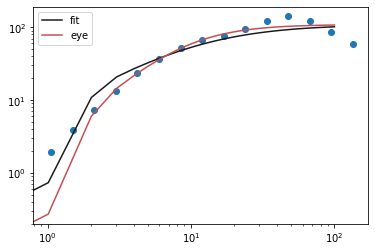

In [6]:
plt.scatter(r,B)

lo=10.56
n=1.15
xx=np.linspace(0,100,100)
a = (np.tanh((xx/s0)**2))**2
c=1/(1+(xx/lo)**n)
yy=2*a*(1-c)*sig2

plt.loglog(xx,yy,color='k', linestyle='-',label='fit')

lo=9.09
n=1.7
xx=np.linspace(0,100,100)
a = (np.tanh((xx/s0)**2))**2
c=1/(1+(xx/lo)**n)
yy=2*a*(1-c)*sig2

plt.loglog(xx,yy,color='r', linestyle='-',label='eye')

plt.legend()

Parameters a and b obtained by eye

In [7]:
pars = lmfit.Parameters()
pars.add_many(('a', 9.09), ('b', 1.7))
def residual(p):
    C=1.0 / (1.0 + (r/p['a'])**p['b'])
    a = (np.tanh((r/s0)**2))**2
    return np.log10(2.0*a*sig2*(1 - C))- np.log10(B)
    #return 2.0*a*sig2*(1 - C)- B

In [8]:
mini = lmfit.Minimizer(residual, pars)
result = mini.minimize()
print(lmfit.fit_report(result.params))

[[Variables]]
    a:  10.5605626 +/- 2.62284000 (24.84%) (init = 9.09)
    b:  1.15602536 +/- 0.18699964 (16.18%) (init = 1.7)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = -0.819


In [9]:
ci = lmfit.conf_interval(mini, result)
lmfit.printfuncs.report_ci(ci)

      99.73%    95.45%    68.27%    _BEST_    68.27%    95.45%    99.73%
 a:  -5.49203  -3.88809  -2.12726  10.56056  +2.95214  +7.91687 +19.21838
 b:  -0.53940  -0.34260  -0.16963   1.15603  +0.18793  +0.42691  +0.78301


In [10]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 3.102210521697998 seconds ---
